In [1]:
from dataeval._internal.datasets import MNIST
from dataeval.metrics.estimators import ber, divergence
from dataeval.utils.torch import read_dataset

In [3]:
train_ds = MNIST(root="../data/", train=True, download=True, flatten=True)
train_cr = MNIST(root="../data/", train=True, download=True, flatten=True, corruption="translate")

Files already downloaded and verified


In [4]:
len(train_ds)

54210

In [8]:
images, labels = read_dataset(train_ds)
len(images)   

54210

In [62]:
import numpy as np

m = len(images)
steps = sorted(m - np.geomspace(m/10, m/1.5, 10, dtype=np.uint))
print(steps)

[48789, 50013, 50961, 51694, 52262, 52702, 53043, 53306, 53510, 53668]


In [56]:
results = {}
for s in steps:
    results[s] = ber(images[:s], labels[:s])

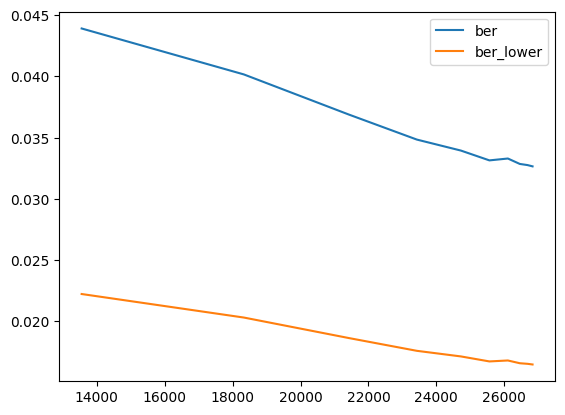

In [57]:
import matplotlib.pyplot as plt

plt.plot(list(results), [v.ber for v in results.values()], label="ber")
plt.plot(list(results), [v.ber_lower for v in results.values()], label="ber_lower")
plt.legend()
plt.show()